In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

False


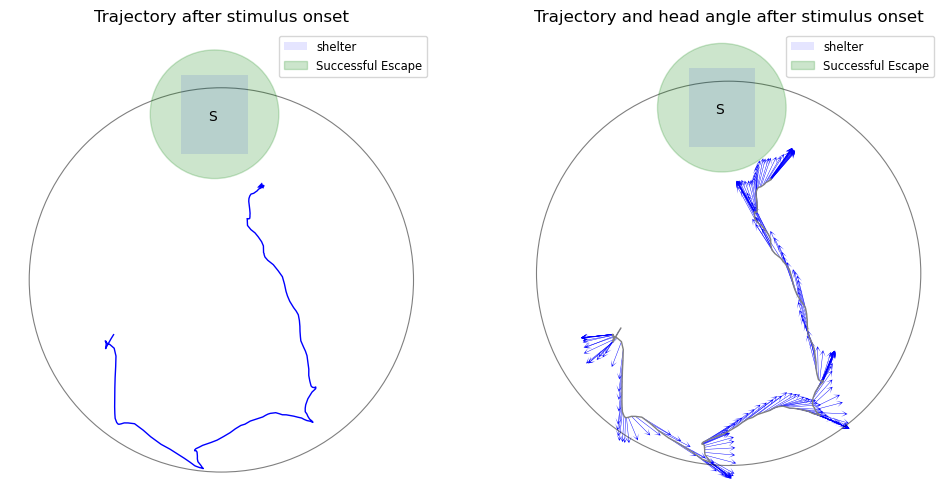

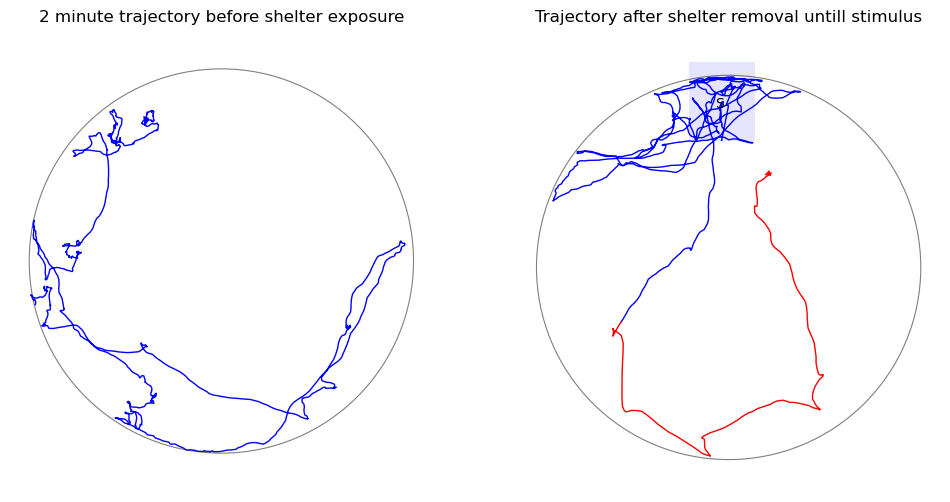

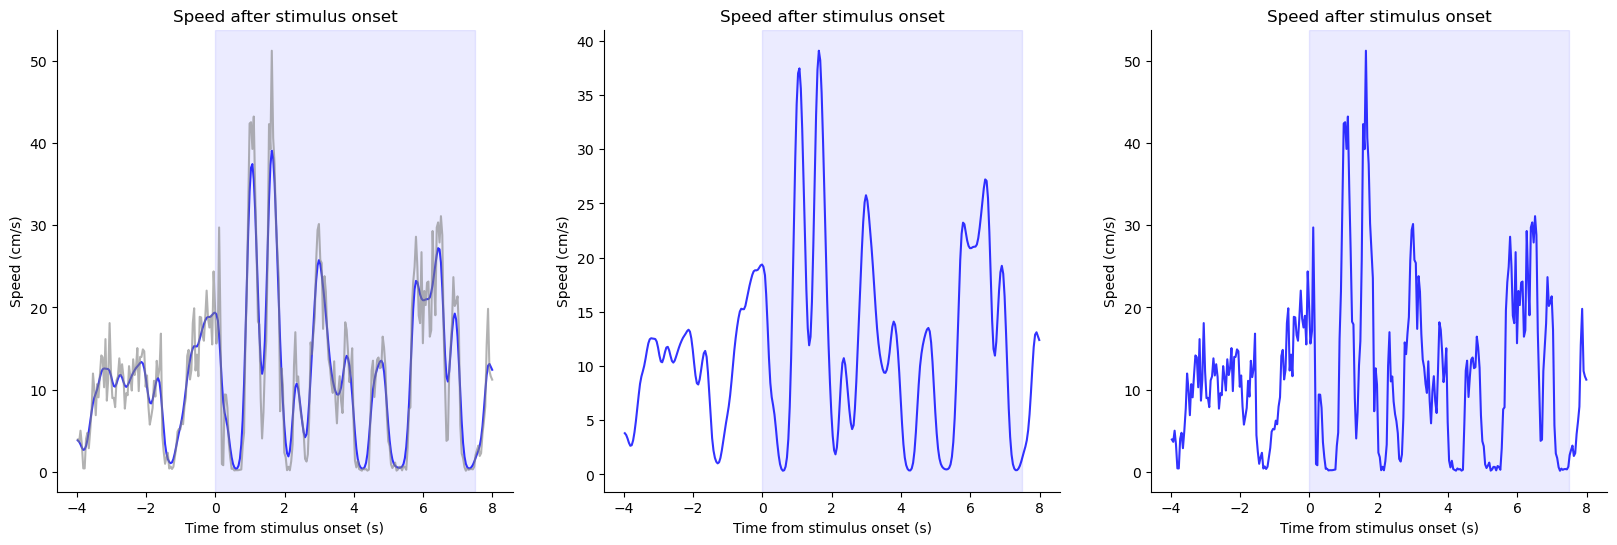

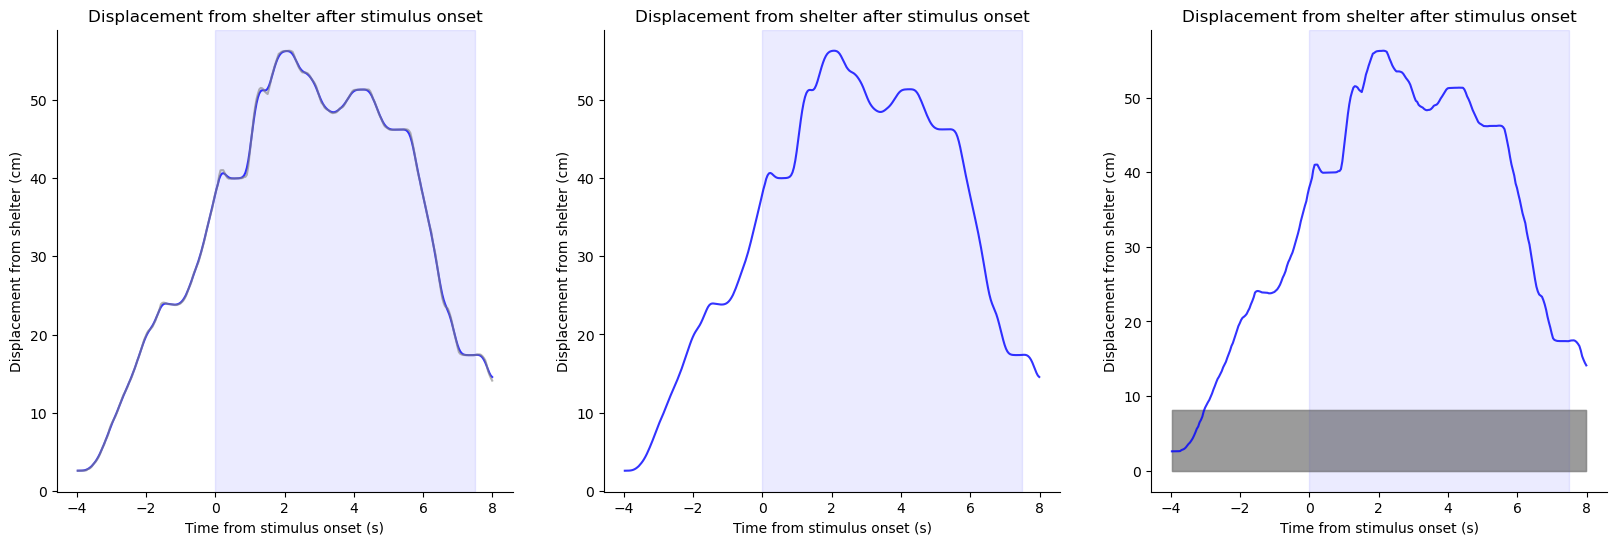

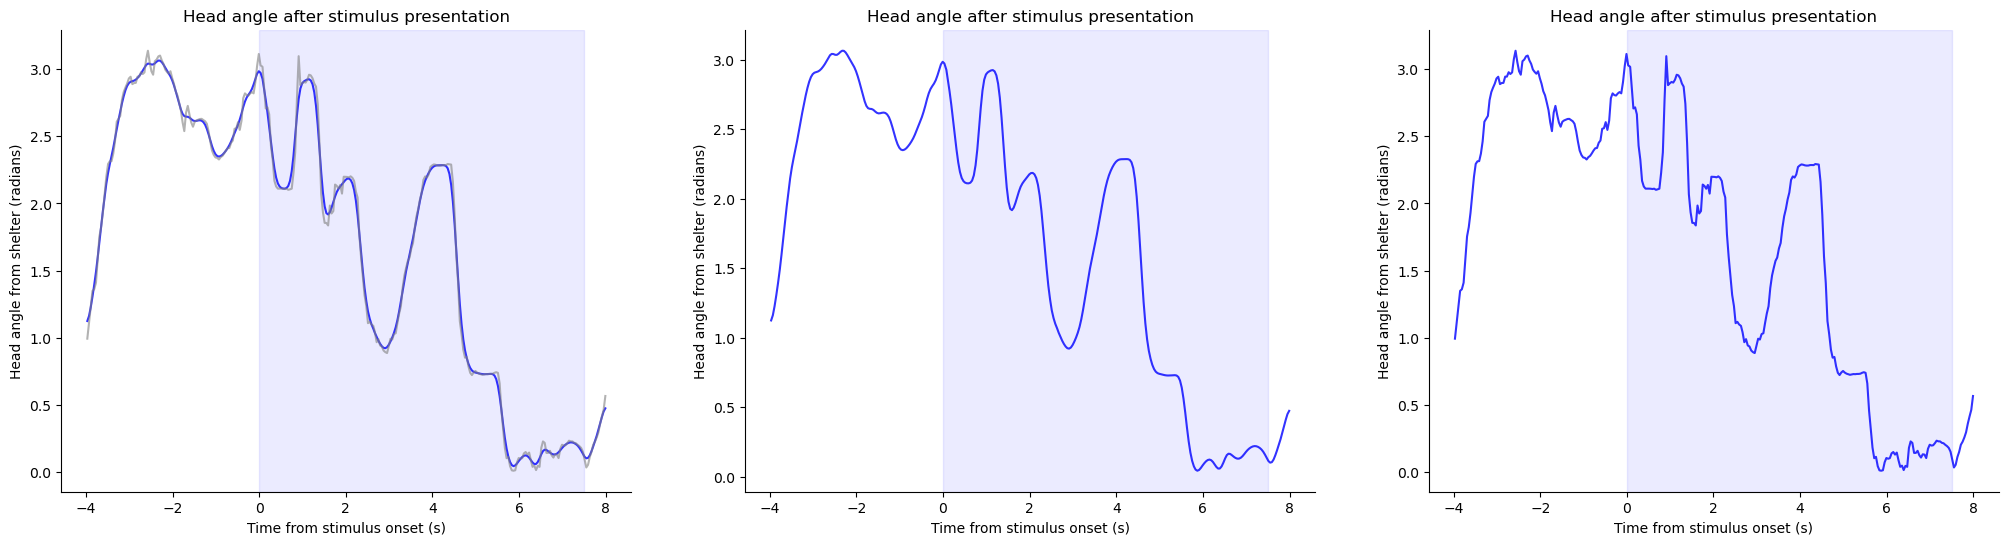

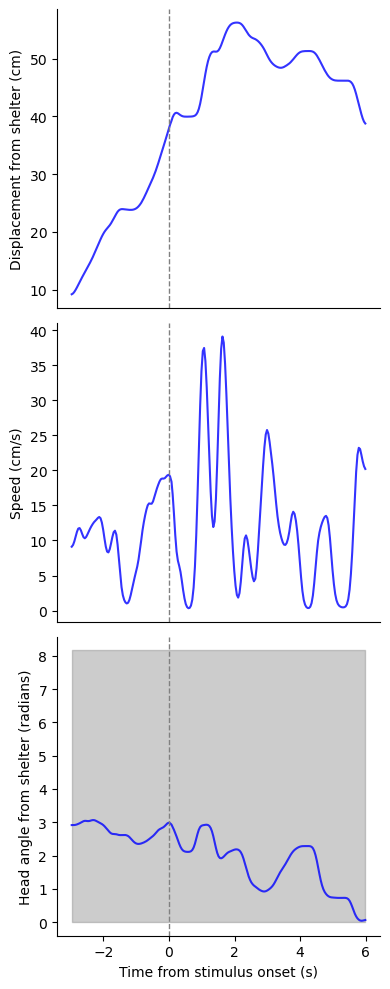

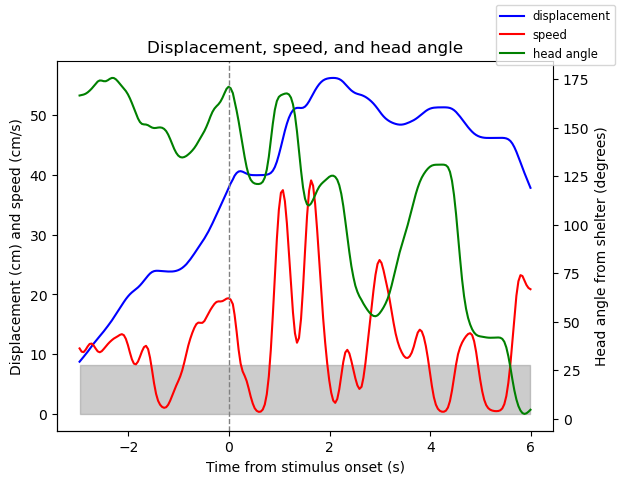

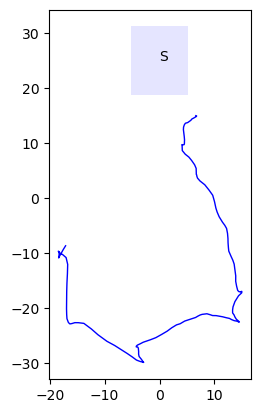

False


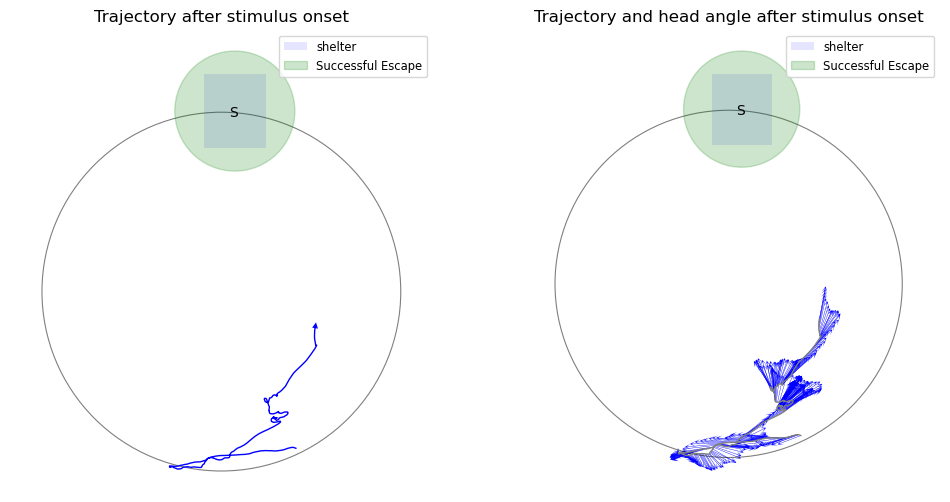

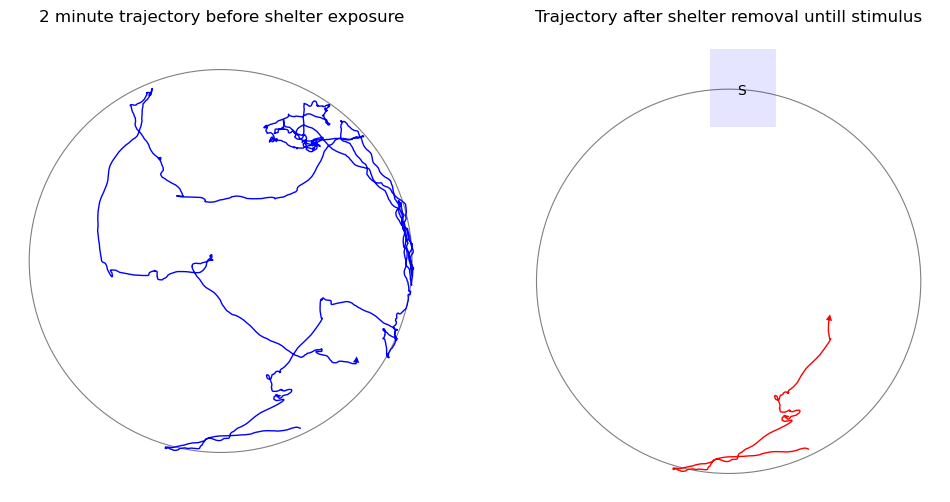

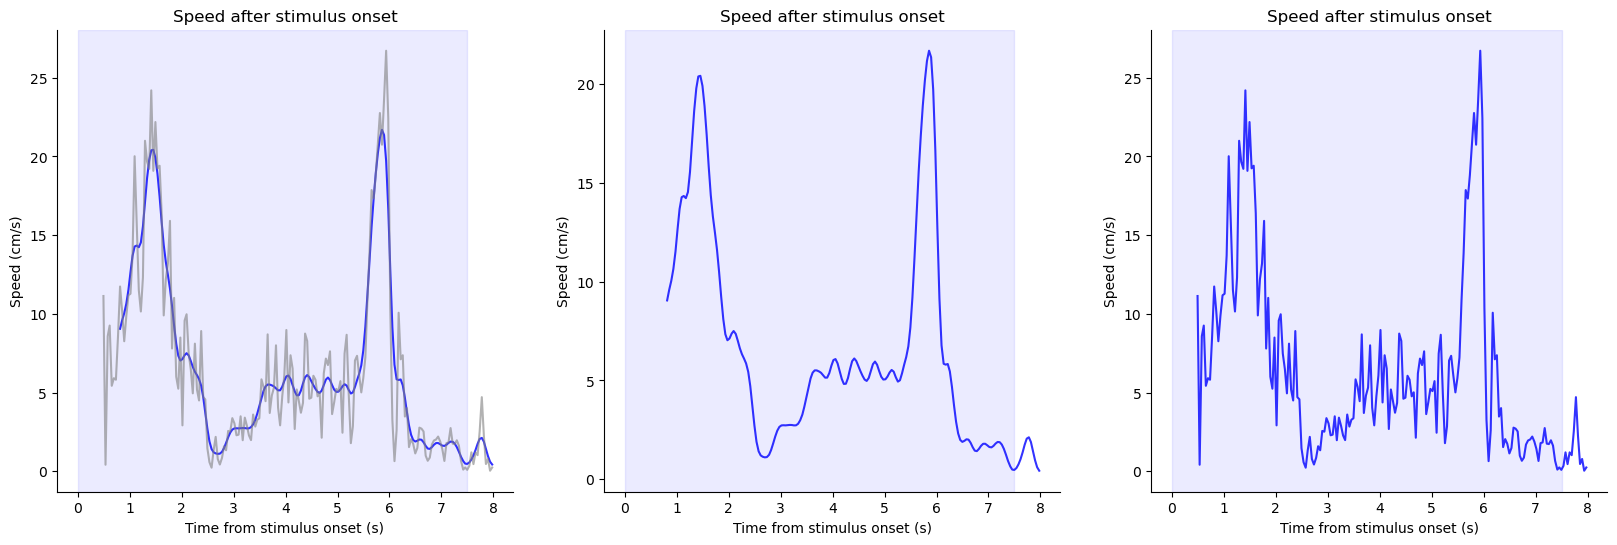

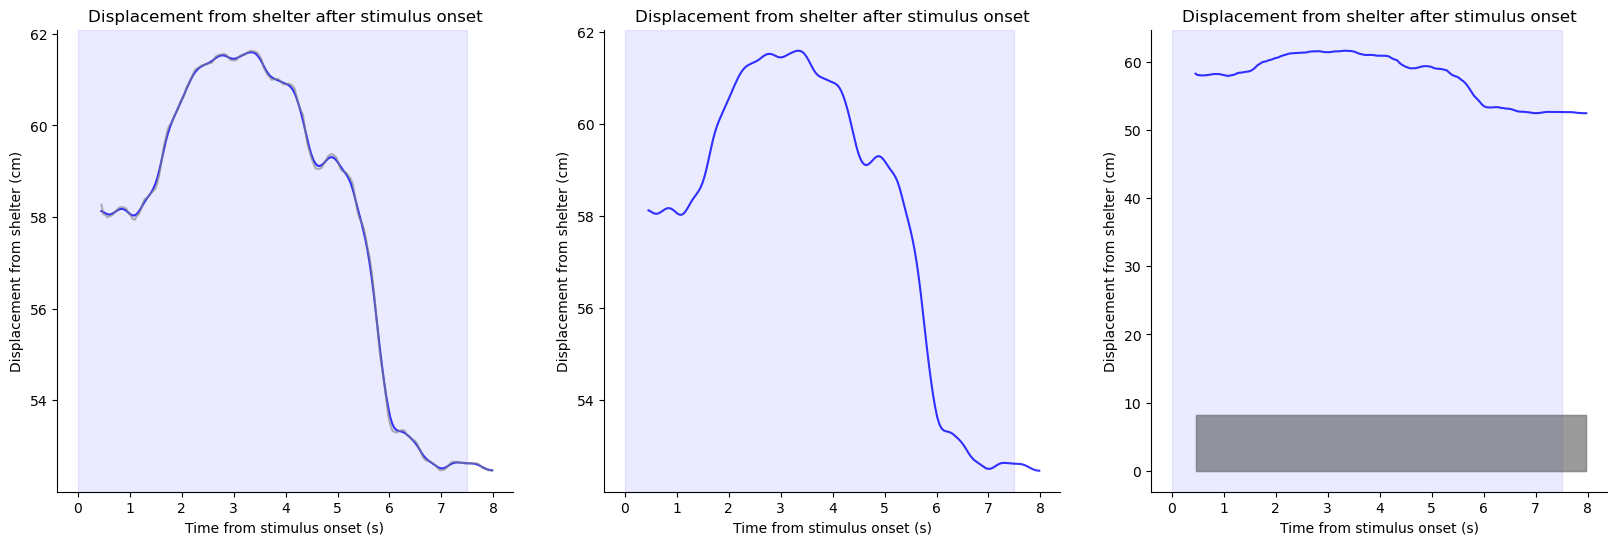

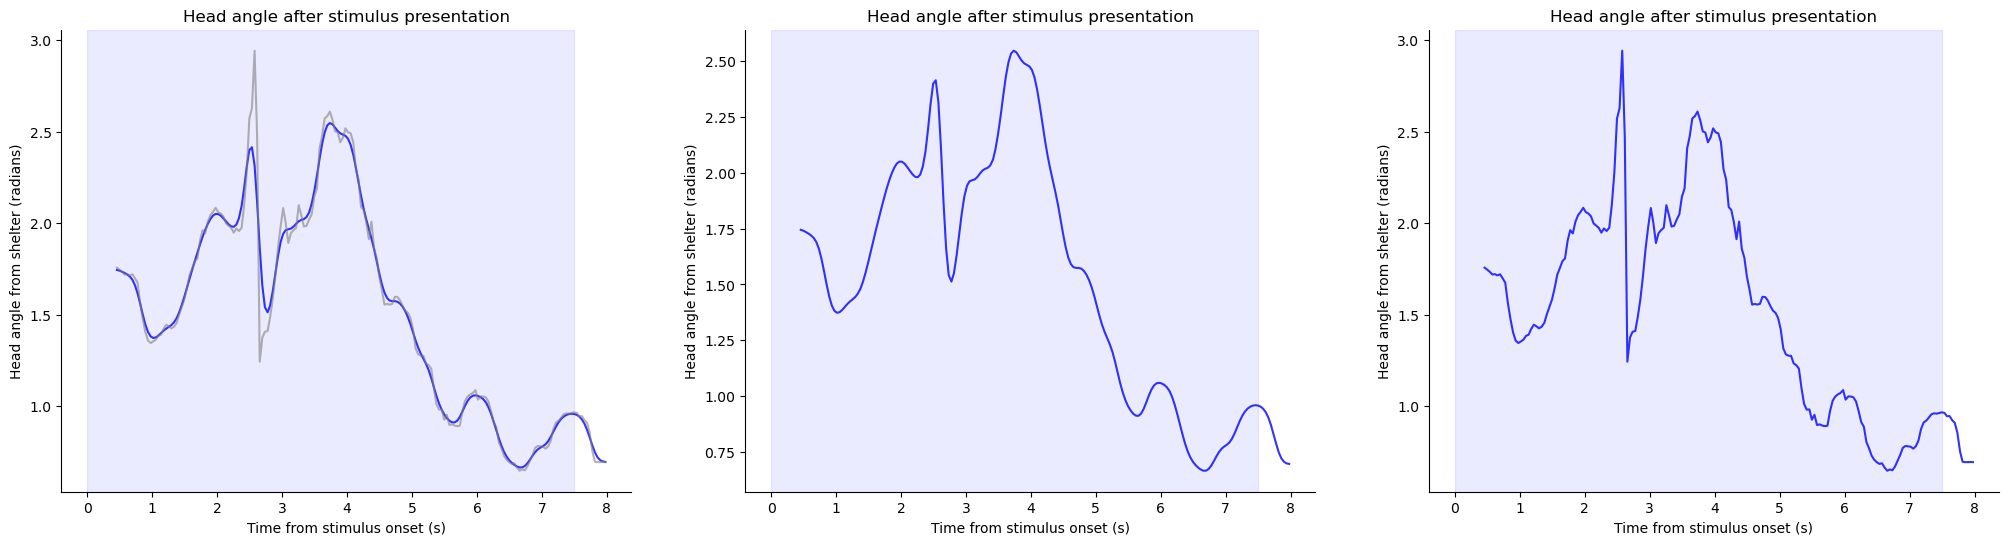

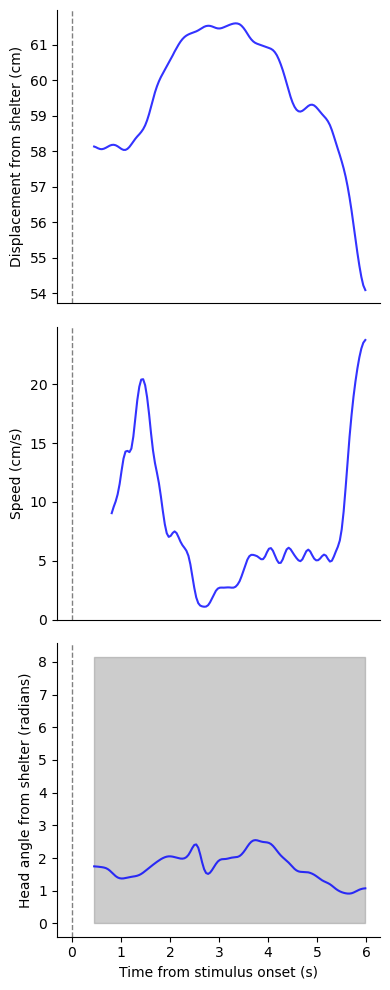

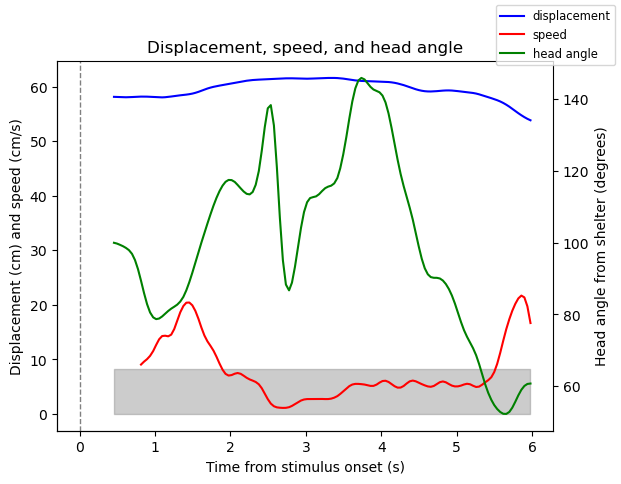

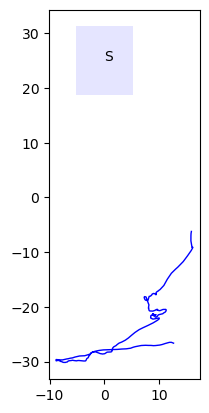

False


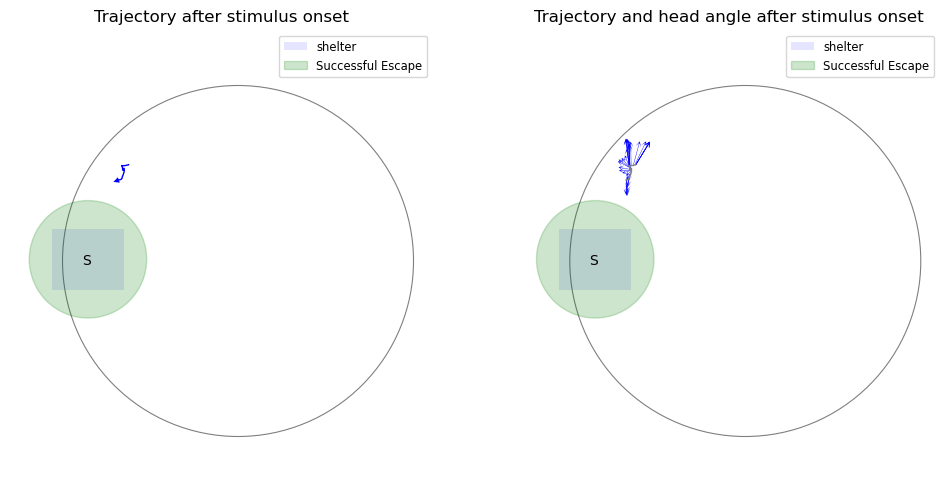

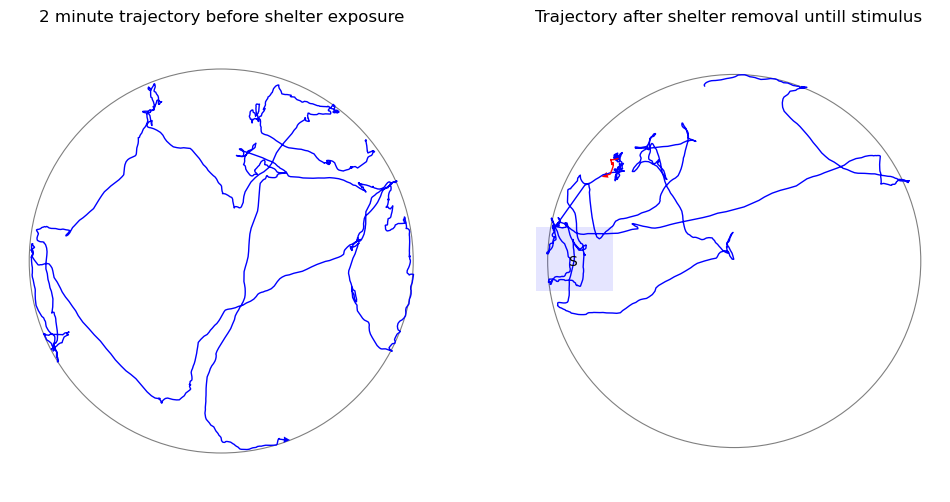

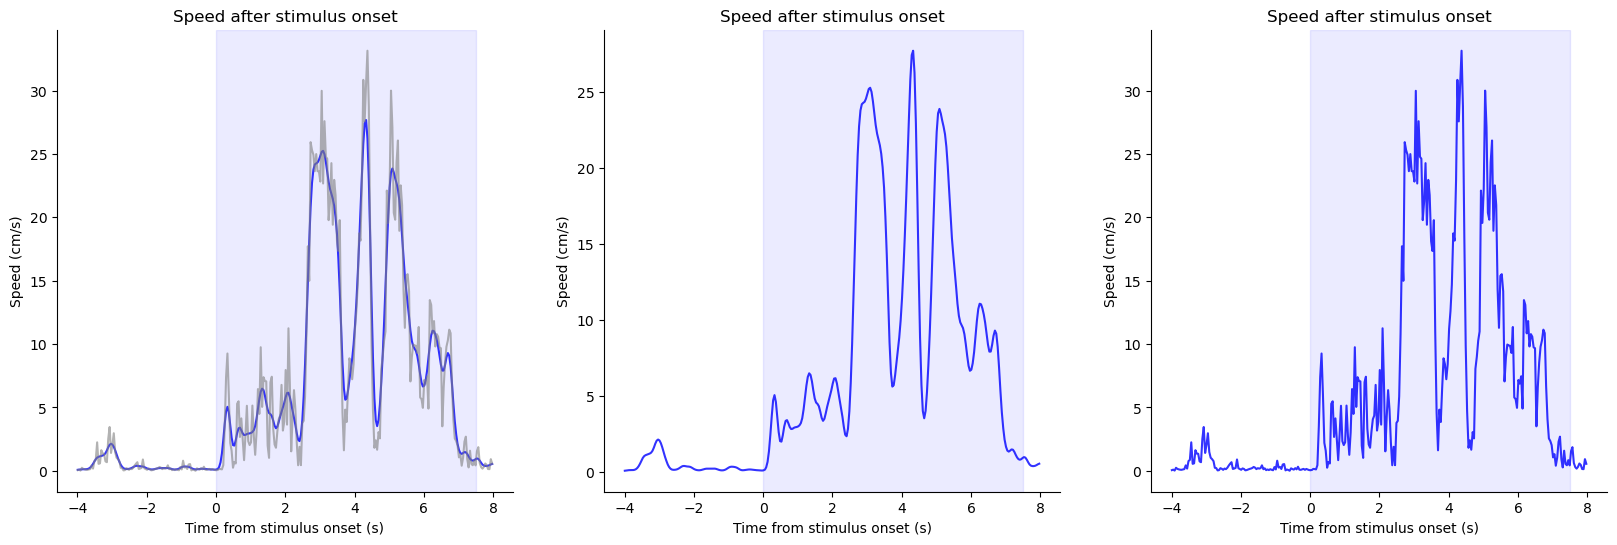

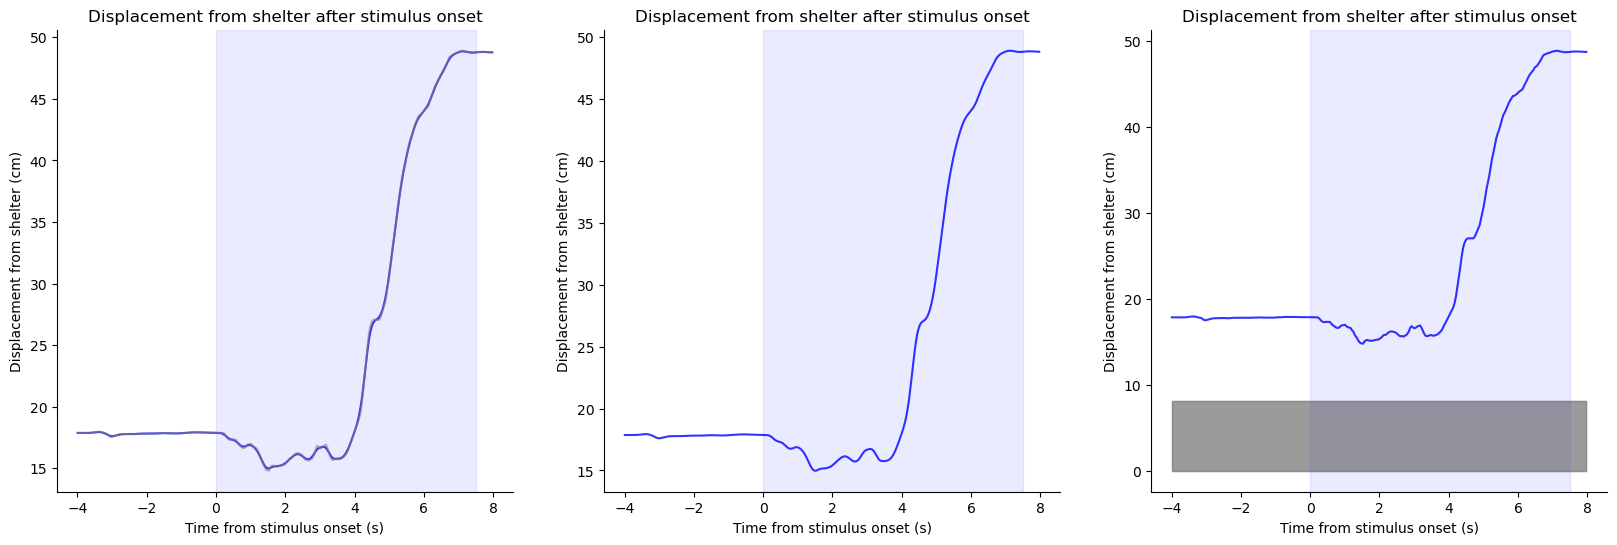

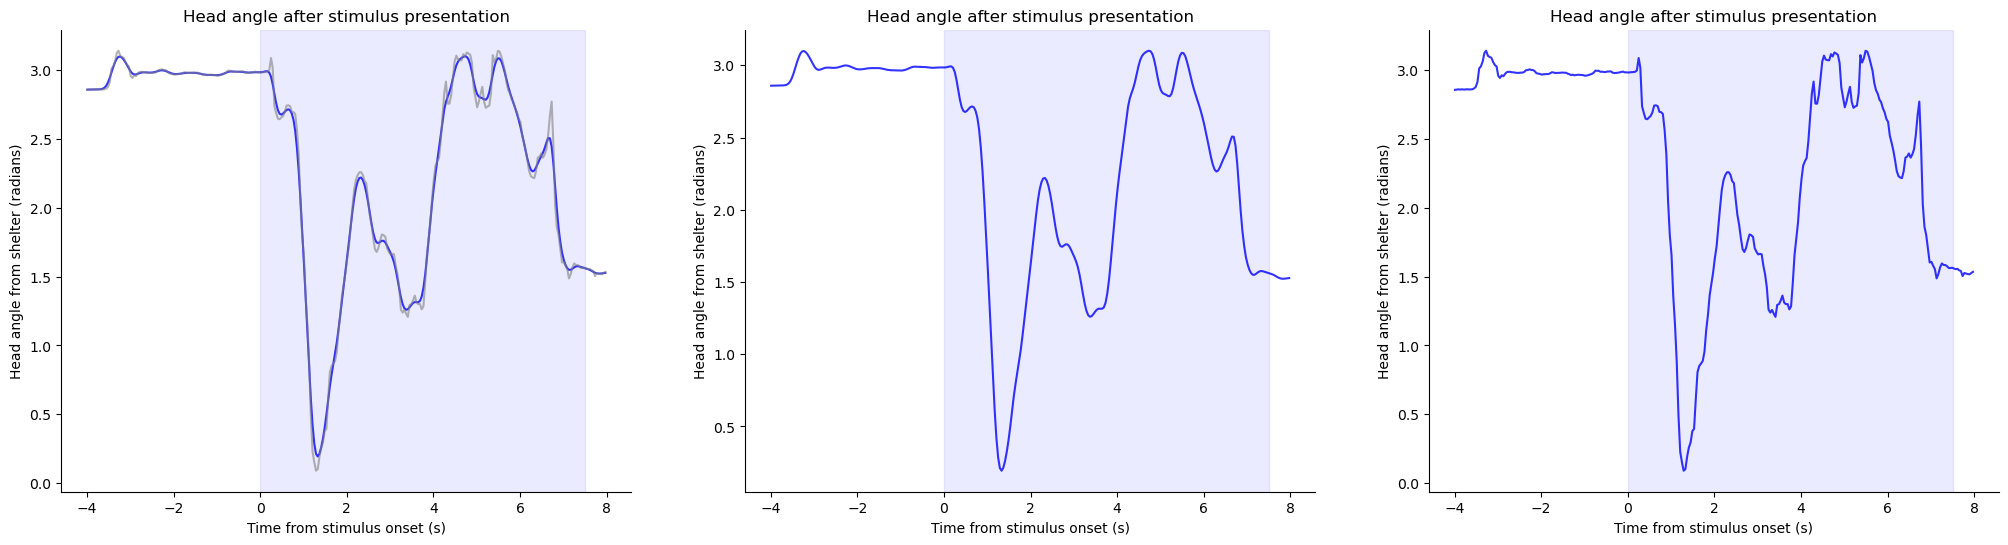

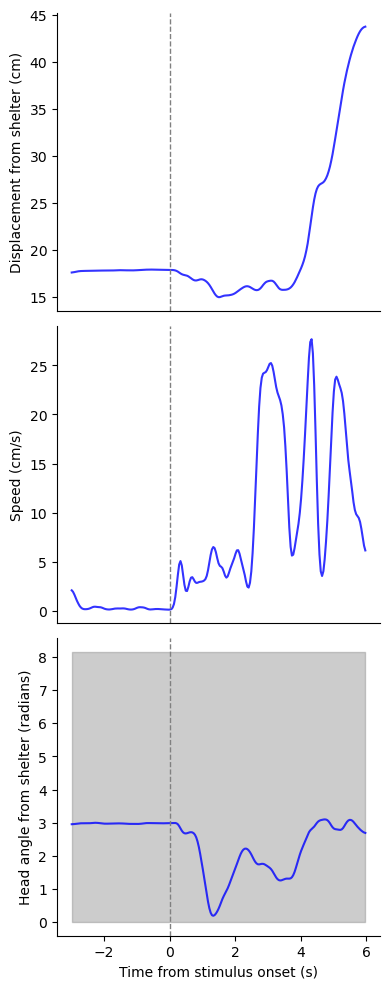

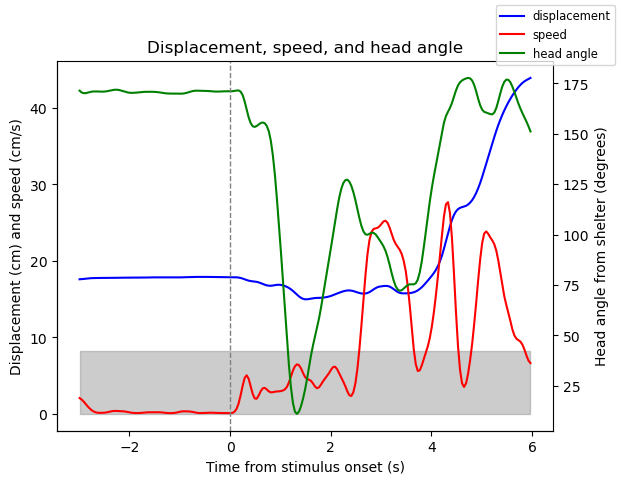

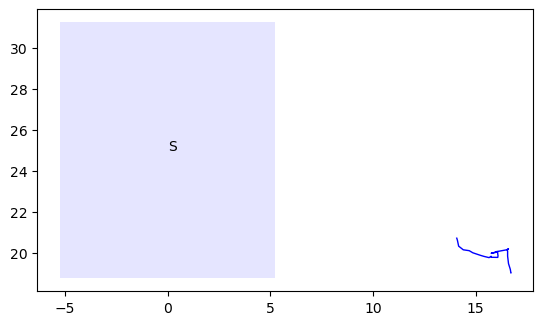

False
8.876147000002675


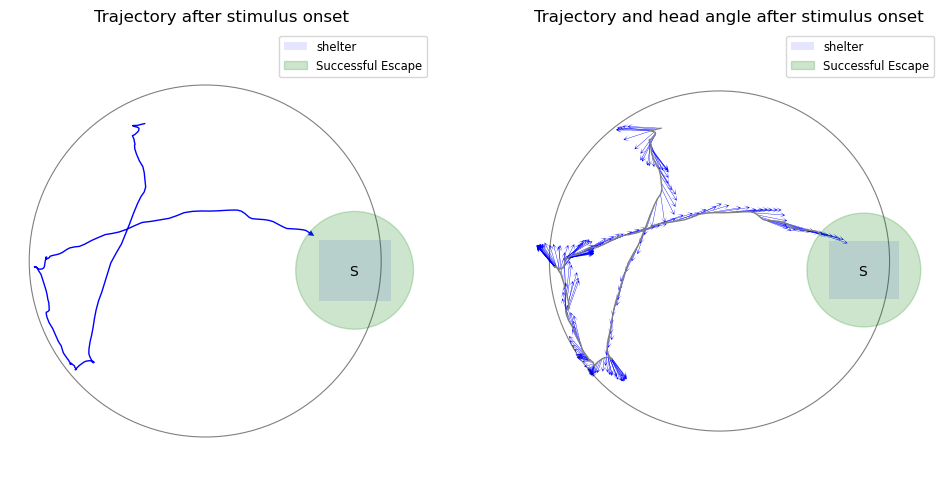

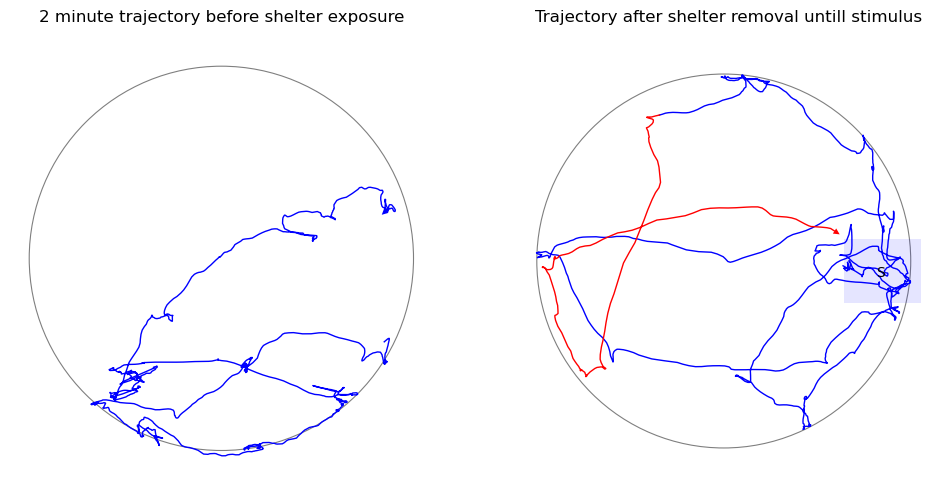

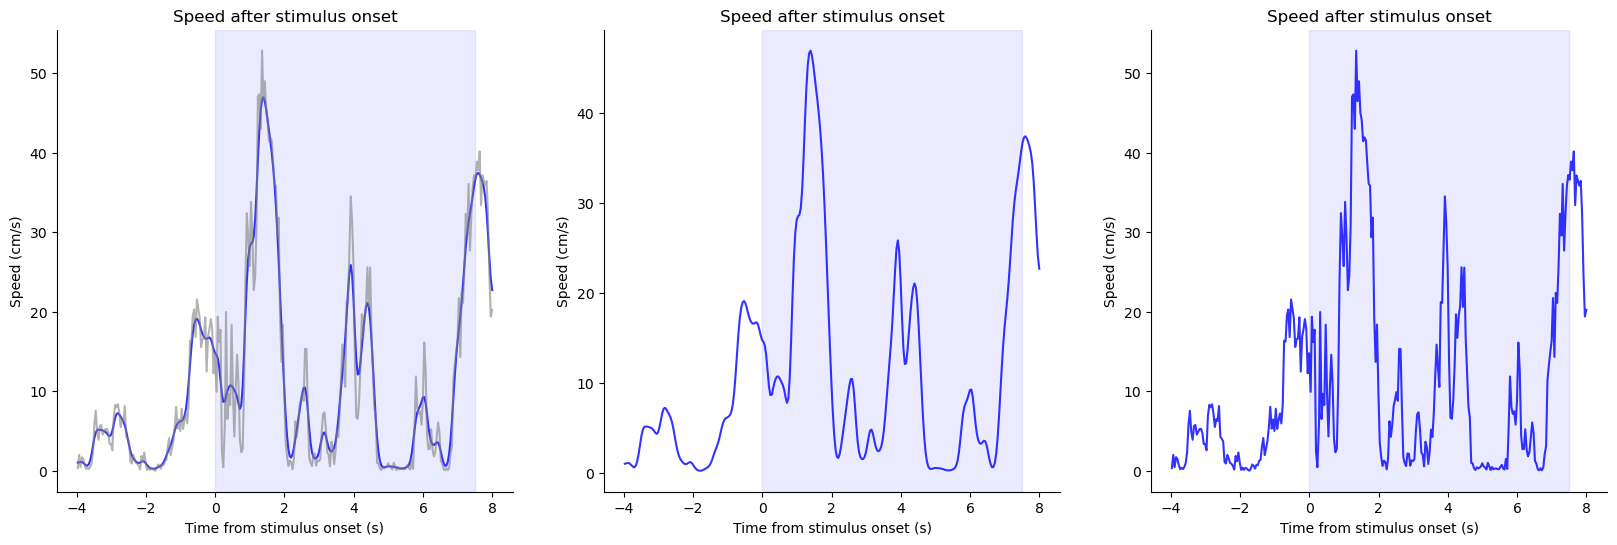

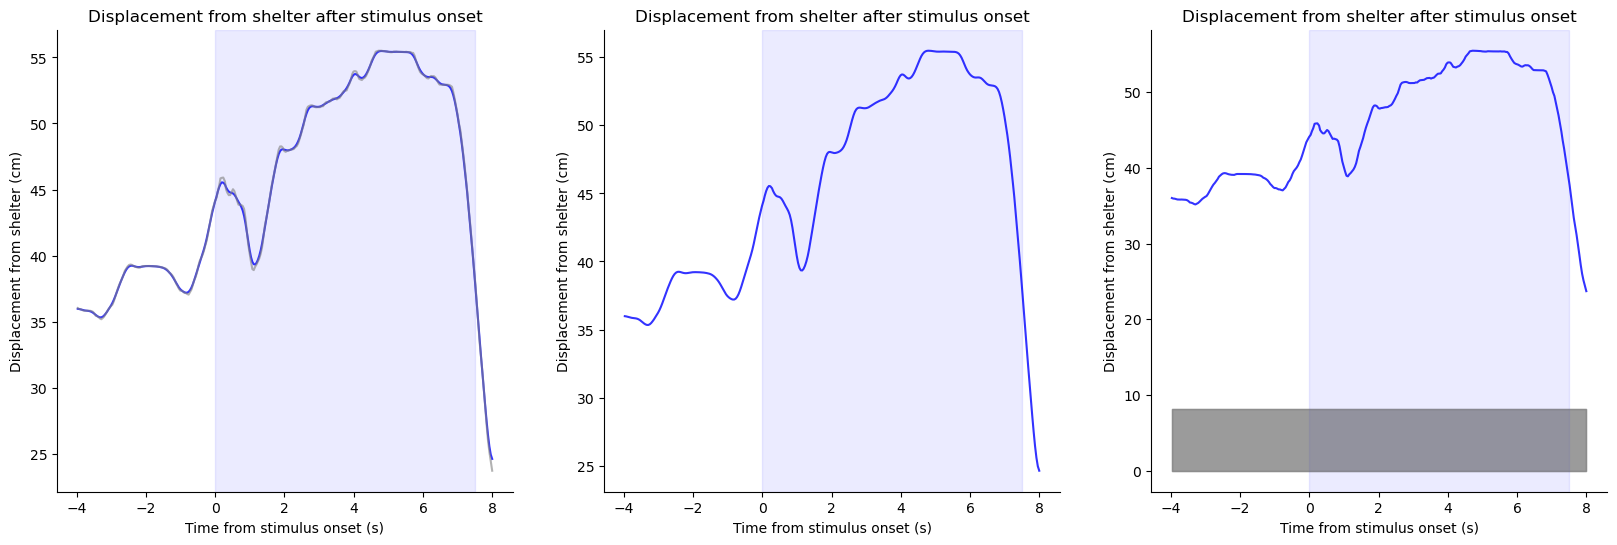

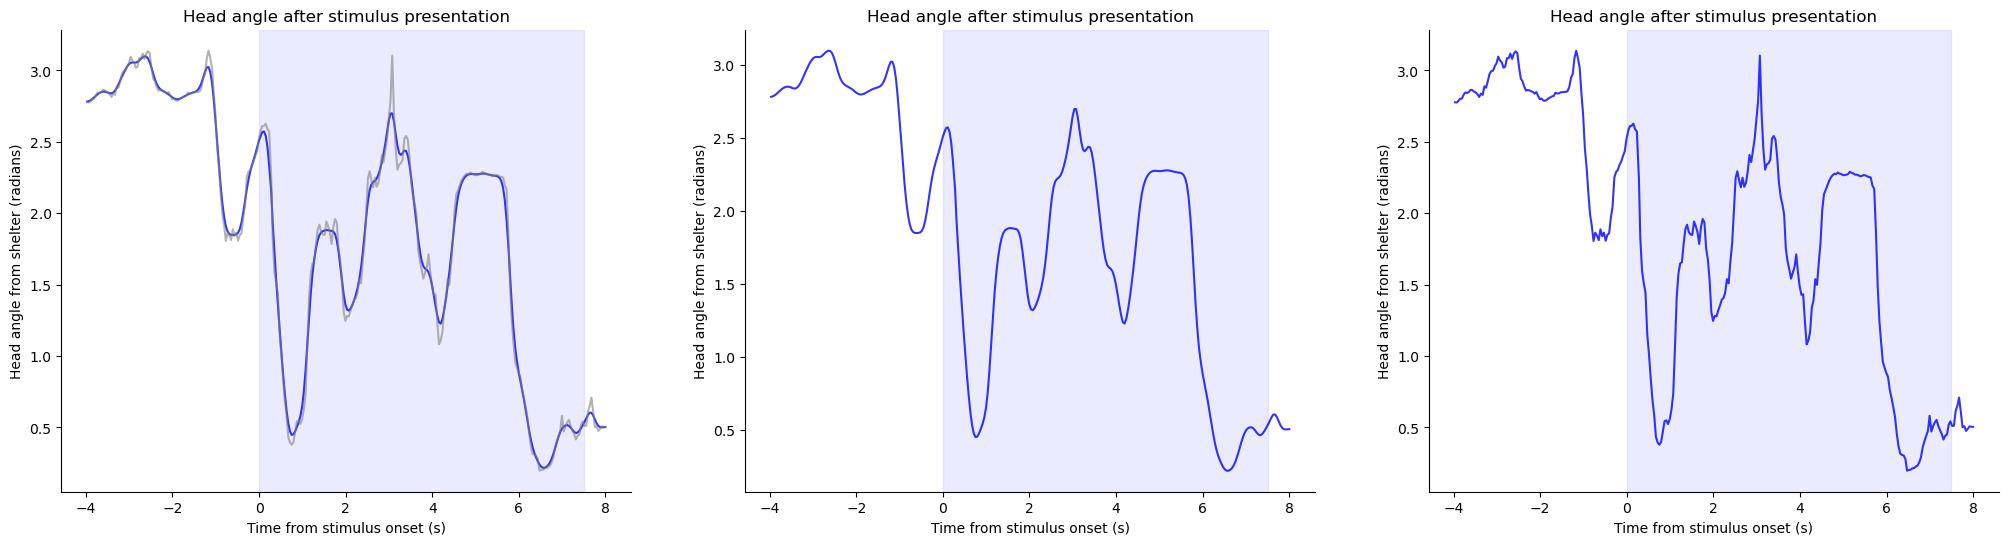

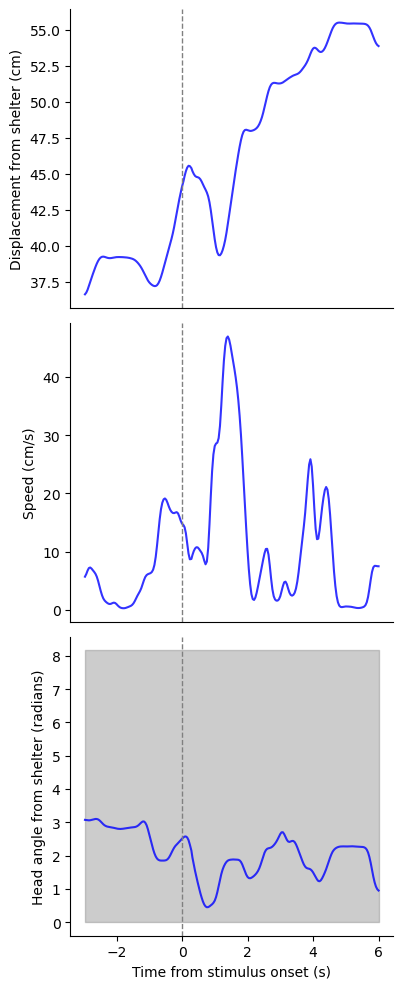

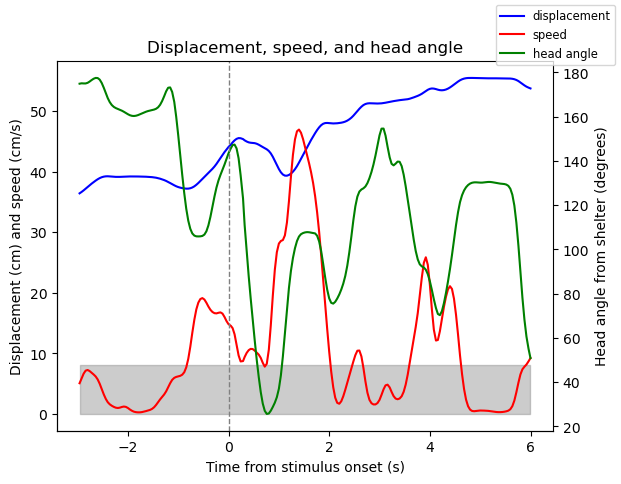

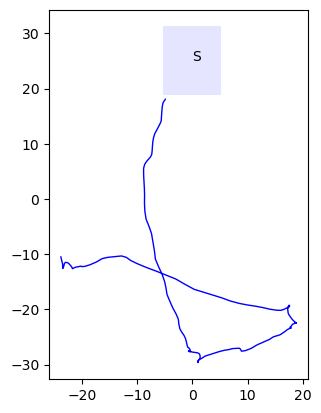

In [2]:
%run A2AM2Control.ipynb
M1_coord_scaled = coord_scaled
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y
M1_shelter_rotate_x = shelter_rotate_x
M1_shelter_rotate_y = shelter_rotate_y
M1_rotate = rotate
M1_coord_scaled_smooth = coord_scaled_smooth

%run A2AM3Control.ipynb
M2_coord_scaled = coord_scaled
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y
M2_shelter_rotate_x = shelter_rotate_x
M2_shelter_rotate_y = shelter_rotate_y
M2_rotate = rotate
M2_coord_scaled_smooth = coord_scaled_smooth

%run A2AM4Control.ipynb
M3_coord_scaled = coord_scaled
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y
M3_shelter_rotate_x = shelter_rotate_x
M3_shelter_rotate_y = shelter_rotate_y
M3_rotate = rotate
M3_coord_scaled_smooth = coord_scaled_smooth

%run A2AM5Control.ipynb
M4_coord_scaled = coord_scaled
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y
M4_shelter_rotate_x = shelter_rotate_x
M4_shelter_rotate_y = shelter_rotate_y
M4_rotate = rotate
M4_coord_scaled_smooth = coord_scaled_smooth



In [3]:
#color scale - maybe adjust, just chose randomly 
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellowgreen', 'black', 'yellow']

In [4]:
#number of dataframes for parameter:
#RETURNS list M1, M2, etc.

#string determines what column you look at (ex: M1_displacement) 
def mouse_columns(n, string):
    mice = [f'M{i}_' + string for i in range(1, n+1)]
    return mice

In [5]:
#create a new dataframe with interpolated displacement, speed, or head angle (choose string)
#input start, stop, step, column of interest, dataframe of interest (ex: look at 'displacement' in coord_scaled)

#RETURNS dataframe with interpolated 
def interpolate_data(start_value, stop_value, step, column, dataframe):
    #create empty dataframe for interpolated info 
    interpolate = pd.DataFrame()
    
    #isolate time range 
    df = dataframe_ranges(start_value, stop_value, dataframe)
    
    #set standard time w 25 fps
    time = np.arange(start_value,stop_value,step)
    interpolate['time'] = time
    
    #interpolate displacement data
    data_raw = df[column]
    time_raw = df['time_set']
    
    inter = np.interp(time, time_raw, data_raw)
    
    #array of interpolated values 
    return inter

In [6]:
#column determines which paramater you look at
#dataframe determines which dataframe you look at 

#RETURNS a dataframe with interpolated values for all mice for a particular parameter and dataframe
def interpolate_all(n,start_value, stop_value, step, column, dataframe, normalized):
    interpolated_df = pd.DataFrame()
    
    #go through each mouse and create column in new dataframe M1, M2, M3, M4, etc. of interpolated data
    for i in range(1, n+1):
        name = f'M{i}' 
        #identify dataframes from each mouse
        mouse_dataframe = globals()[f'M{i}_' + dataframe] 
        interpolated_df[name] = interpolate_data(start_value, stop_value, step, column, mouse_dataframe)
    
    #define time range
    time = np.arange(start_value,stop_value,step)  
    interpolated_df['time'] = time
    
    #normalize if specified in parameters - revisit this normalization!!! 
    if normalized:
        normalized_df = normalize_all(interpolated_df)
        return normalized_df
    else:
        return interpolated_df

In [7]:
#return normalized df (linear normalization - should change this)
def normalize(df):
    min_value = df.min()
    max_value = df.max()
    range_value = max_value - min_value
    normalized = (df - min_value) / range_value
    return normalized

def normalize_all(df): #ex displacement_interpolated, displacement_interpolated_smooth
    normalized_df = pd.DataFrame()
    
    for i in range(1, n+1):
        normalized_df[f'M{i}'] = normalize(df[f'M{i}'])
        
    normalized_df['time'] = df['time']
    return normalized_df

In [8]:
#find mean and upper and lower limit for SEM for dataframe of choice 
#create new columns in df with average and upper and lower bounds
def summarize_data(df, mice):   
    df['average'] = df[mice].mean(axis = 1)
    SEM = df[mice].sem(axis = 1)
    df['SEM_up'] = df['average'] + SEM
    df['SEM_down'] = df['average'] - SEM

In [9]:
#plot average + SEM
#string determines what column you look at 

def plot_compiled_displacement(n, start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()

    mice = [f'M{i}' for i in range(1, n+1)]
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()
    
    #interpolate data and normalize if specified
    df = interpolate_all(n, start_value, stop_value, step, column, dataframe, normalized)
    
    #find average and upper and lower bounds
    summarize_data(df, mice)
    
    #plot
    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    ax.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    
    if normalized:
        ax.set_ylabel('Displacement from shelter (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('Displacement from shelter (cm)') #convert to cm - cm/s
        
    ax.set_title('Average displacement from shelter after stimulus onset')

    #either plot dotted line or show region where stimulus starts and stops if time frame extends 7.5s
    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)
    
    plt.xlim(min(x), max(x))

    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return plt

In [10]:
#choose number of mice and df (ex, interpolated_displacement_smooth, interpolated_displacement)
  #graph of displacement vs time
def plot_all_displacement(n, start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()

    df = interpolate_all(n,  start_value, stop_value, step, column, dataframe, normalized)
    
    x = df['time']
    
    #go through and plot each mouse's displacement
    for i in range(1, n+1):
        y = df[f'M{i}']
        plt.plot(x, y)

    ax.set_xlabel('Time from stimulus (s)')
    
    if normalized:
        ax.set_ylabel('Displacement from shelter (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('Displacement from shelter (cm)') #convert to cm - cm/s
        
    ax.set_title('Displacement from shelter during stimulus presentation')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)

    plt.xlim(min(x), max(x))

    #Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return plt

In [11]:
#plot compiled average and SEM for head angle
#same structure as displacement
def plot_compiled_angle(n,start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()
    mice = [f'M{i}' for i in range(1, n+1)]

    df = interpolate_all(n,start_value, stop_value, step, column, dataframe, normalized)
    summarize_data(df, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    
    if normalized:
        ax.set_ylabel('Head angle from shelter (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('Head angle from shelter (radians)') #convert to cm - cm/s

    ax.set_title('Head angle from shelter after stimulus onset')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return plt

In [12]:
#plot all for angle
def plot_all_angle(n,start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()
    df = interpolate_all(n, start_value, stop_value, step, column, dataframe, normalized)
    x = df['time']
    
    for i in range(1, n+1):
        y = df[f'M{i}']
        plt.plot(x, y)

    ax.set_xlabel('Time from stimulus onset (s)')
    
    if normalized:
        ax.set_ylabel('Head angle from shelter (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('Head angle from shelter (radians)') #convert to cm - cm/s
        
    ax.set_title('Head angle from shelter after stimulus onset')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)

        
    plt.xlim(min(x), max(x))

    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return plt

In [13]:
#plot average + SEM for speed
def plot_compiled_speed(n, start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()
    mice = [f'M{i}' for i in range(1, n+1)]

    df = interpolate_all(n, start_value, stop_value, step, column, dataframe, normalized)
    summarize_data(df, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    if normalized:
        ax.set_ylabel('speed (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('speed (cm/s)') #convert to cm - cm/s
    
    ax.set_title('Average speed after stimulus onset')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return plt

In [14]:
#plot all speed
def plot_all_speed(n, start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()
    df = interpolate_all(n, start_value, stop_value, step, column, dataframe, normalized)
    x = df['time']
    
    for i in range(1, n+1):
        y = df[f'M{i}']
        plt.plot(x, y)


    ax.set_xlabel('Time from stimulus onset (s)')
    
    if normalized:
        ax.set_ylabel('speed (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('speed (cm/s)') #convert to cm - cm/s
    
    ax.set_title('Speed after stimulus onset')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)

    plt.xlim(min(x), max(x))

    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return plt

In [15]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellowgreen']
def plot_compiled_trajectory(n):
    fig = plt.figure()  #create figure to fill in
    ax = plt.axes()
    
    for i in range (1, n+1):
        mice = mouse_columns(n, 'rotate')
        df = globals()[mice[i-1]]
        ax.plot(df['rotated_shift_x'], df['rotated__shift_y'], color = colors[i-1], linewidth = 1)
        
    #add an arrow to show mouse's direction
        xf = df['rotated_shift_x'].iloc[-1] #final x coordinate
        xo = df['rotated_shift_x'].iloc[-2] #second to last x coordinate

        yf = df['rotated__shift_y'].iloc[-1] #final y coordinate
        yo = df['rotated__shift_y'].iloc[-2] #second to last y coordinate

    #plot arrow: base x, base y, displacement x, displacement y
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc =colors[i-1], ec = "none")
        ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
        ax.set_xlabel('x-position (cm)', fontsize=12)
        ax.set_ylabel('y-position (cm)', fontsize=12)
    
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = colors[i-1], ec = "none")

    #ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc = 'blue', ec = "none")
    platform = Ellipse(xy = (1, 0), width = x_diam, height = y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    ax.add_patch(platform)
    shelter = patches.Rectangle(((0 - 5.25), (25-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.add_patch(shelter)

    
    ax.set_aspect('equal')
    ax.text(0-1,25-1, 'S', color = 'black', size = 10)

    
    ax.axis('off')
    return plt